In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# wrangle function
def wrangle(df):
    df = pd.read_csv("movie.csv")
    return df

In [12]:
df = wrangle(df)
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In this dataframe, we have two columns: text (the review) and the label (whether the sentiment is good or not).

In [13]:
# data cleaning
df.isnull().sum()

text     0
label    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

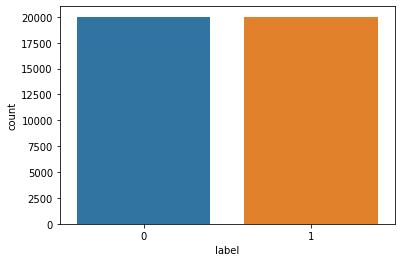

In [17]:
sns.countplot(data = df, x = "label")

In [18]:
import spacy
nlp = spacy.load("en_core_web_md")

In [26]:
# clean text
import re
def clean_text(text):
    '''Takes in text and cleans it'''
    # remove non alphabetical characters
    non_alpha = "[^a-zA-Z\d\s:]"
    text = re.sub(non_alpha, " ", text)
    # removes numbers
    num = "([0-9]+)"
    text = re.sub(num, " ", text)
    # remove double white spaces
    text = text.replace("  ", " ")
    # normalize case and remove extra whitespaces
    return text.lower().strip()

In [27]:
# clean the text in the dataframe
df["text"] = df["text"].apply(clean_text)
df.head()

,text,label
0,i grew up b watching and loving the thunderb...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [28]:
# tokenize our data
def tokenize(text):
    doc = nlp(text)
    lemma_list = []
    for token in doc:
        if (not token.is_stop) and (not token.is_punct):
            if (token.lemma_.strip != ""):
                lemma_list.append(token)
    return lemma_list

In [31]:
lemma_list = df["text"].apply(tokenize)

In [32]:
df["lemma_list"] = lemma_list

In [35]:
# list of lemmas is saved to the dataframe as to not have to retokenize (it takes a LONG time)
df.to_csv("movie.csv")

In [36]:
df = pd.read_csv('movie.csv')

In [38]:
df.head()

,Unnamed: 0,text,label,lemma_list
0,0,i grew up b watching and loving the thunderb...,0,"[grew, b, , watching, loving, thunderbirds, ..."
1,1,when i put this movie in my dvd player and sat...,0,"[movie, dvd, player, sat, coke, chips, expecta..."
2,2,why do people who do not know what a particula...,0,"[people, know, particular, time, past, like, f..."
3,3,even though i have great interest in biblical ...,0,"[great, interest, biblical, movies, bored, dea..."
4,4,im a die hard dads army fan and nothing will e...,1,"[m, die, hard, dads, army, fan, change, got, t..."
